In [1]:
%load_ext autoreload
%autoreload 2

In [45]:
import numpy as np
import pandas as pd
import stumpy as sp

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 3]

import os
import sys
sys.path.insert(0, './../')

from tsmule.sampling.segment import MatrixProfileSegmentation, SAXSegmentation, WindowSegmentation
from tsmule.xai.viz import visualize_segmentation_mask

In [46]:
url = 'https://zenodo.org/record/4273921/files/STUMPY_Basics_steamgen.csv?download=1'
df = pd.read_csv(url)

n = 512
ts = df['steam flow'][:n]
ts2 = df['drum pressure'][:n]
mts = np.stack([ts, ts2], axis=1)

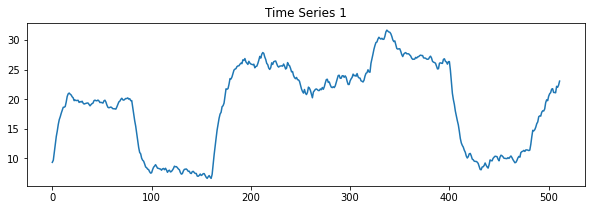

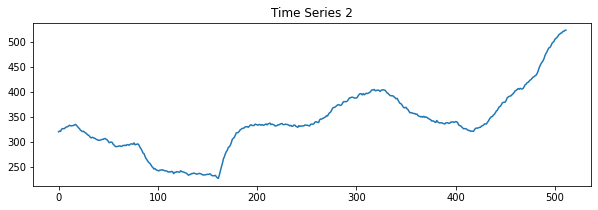

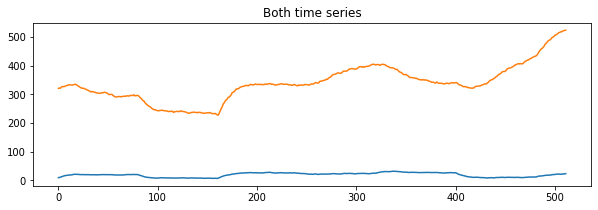

In [47]:
plt.title('Time Series 1')
plt.plot(mts[:, 0])
plt.show()

plt.title('Time Series 2')
plt.plot(mts[:, 1])
plt.show()

plt.title('Both time series')
plt.plot(mts)
plt.show()

In [48]:
time_series_sample = mts[:, 0]
mp_win_len = 50

mp = sp.stump(time_series_sample, mp_win_len)
mp_ = mp[:, 0]
mp_sorted = sorted(mp_)
mp_idx_sorted = np.argsort(mp_)

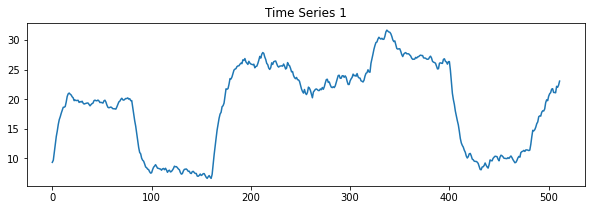

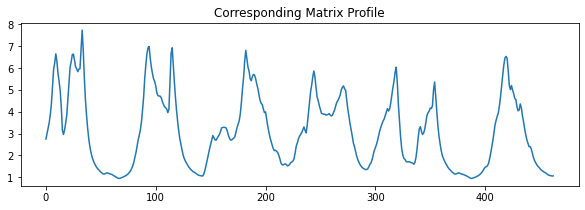

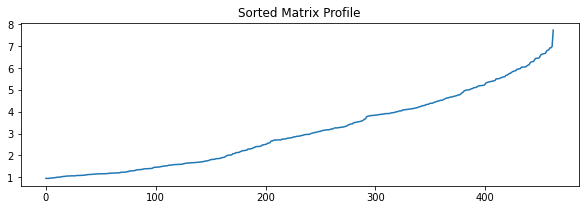

In [49]:
plt.title('Time Series 1')
plt.plot(time_series_sample)
plt.show()

plt.title('Corresponding Matrix Profile')
plt.plot(mp_)
plt.show()

plt.title('Sorted Matrix Profile')
plt.plot(mp_sorted)
plt.show()

In [50]:
k = 10

slopes = np.array([(mp_sorted[i] - mp_sorted[i + 1]) / (i - (i + 1))  for i in range(len(mp_sorted) - 1)])

slopes_sorted = np.argsort(slopes)[::-1][:k]

partitions_idx_sorted = sorted([mp_idx_sorted[part] for part in slopes_sorted])

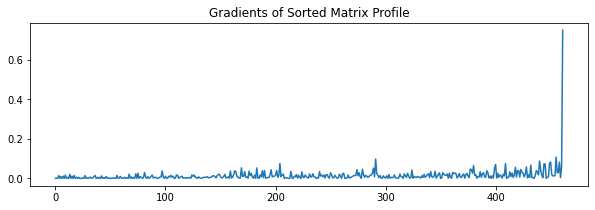

array([461, 455, 291, 440, 450, 458, 449, 409, 204, 445])

In [58]:
plt.plot(slopes)
plt.title('Gradients of Sorted Matrix Profile')
plt.show()

slopes_sorted

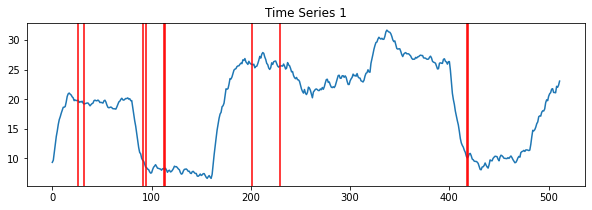

In [52]:
plt.title('Time Series 1')
plt.plot(time_series_sample)

for j in partitions_idx_sorted:
    plt.axvline(x=j, color='red')

plt.show()

In [ ]:
plt.title('Time Series 1')
plt.plot(time_series_sample)

for j in partitions_idx_sorted:
    plt.axvline(x=j, color='red')

plt.show()

In [53]:
k = 10

slopes2 = np.abs(np.array([(mp_[i] - mp_[i + 1]) / (i - (i + 1))  for i in range(len(mp_) - 1)]))

slopes2_sorted = np.argsort(slopes2)[::-1][:k]
slopes2_sorted = np.argsort(slopes2)[::-1][:k]

partitions_idx_sorted = sorted([mp_idx_sorted[part] for part in slopes2_sorted])

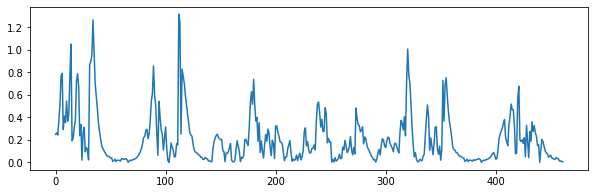

array([112,  34, 113,  14, 320,  35,  33,  32,  31,  89])

In [54]:
plt.plot(slopes2)
plt.show()

slopes2_sorted

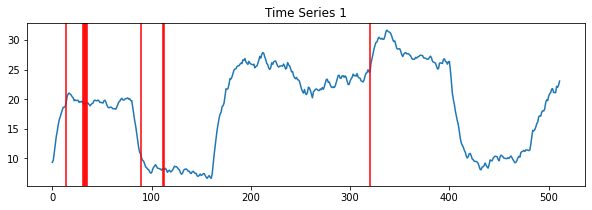

In [56]:
plt.title('Time Series 1')
plt.plot(time_series_sample)

for j in sorted(slopes2_sorted):
    plt.axvline(x=j, color='red')

plt.show()